In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('singapore_airbnb.csv')

#### data source = https://www.kaggle.com/jojoker/singapore-airbnb

In [3]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,10/21/2013,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,12/26/2014,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,10/1/2015,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,8/11/2019,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,7/28/2019,0.22,9,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,38105126,Loft 2 pax near Haw Par / Pasir Panjang. Free ...,278109833,Belle,Central Region,Queenstown,1.27973,103.78751,Entire home/apt,100,3,0,NaN,NaN,31,61
7903,38108273,3bedroom luxury at Orchard,238891646,Neha,Central Region,Tanglin,1.29269,103.82623,Entire home/apt,550,6,0,NaN,NaN,34,365
7904,38109336,[ Farrer Park ] New City Fringe CBD Mins to MRT,281448565,Mindy,Central Region,Kallang,1.31286,103.85996,Private room,58,30,0,NaN,NaN,3,173
7905,38110493,Cheap Master Room in Central of Singapore,243835202,Huang,Central Region,River Valley,1.29543,103.83801,Private room,56,14,0,NaN,NaN,2,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [5]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,1.314192,103.848787,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,0.030577,0.043675,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,1.243870,103.646560,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,1.295795,103.835825,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,1.311030,103.849410,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,1.322110,103.872535,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,1.454590,103.973420,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


In [6]:
# Checking if there is any duplicated data
duplicates = data.duplicated()
data[duplicates]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


- no duplicated data

<AxesSubplot:>

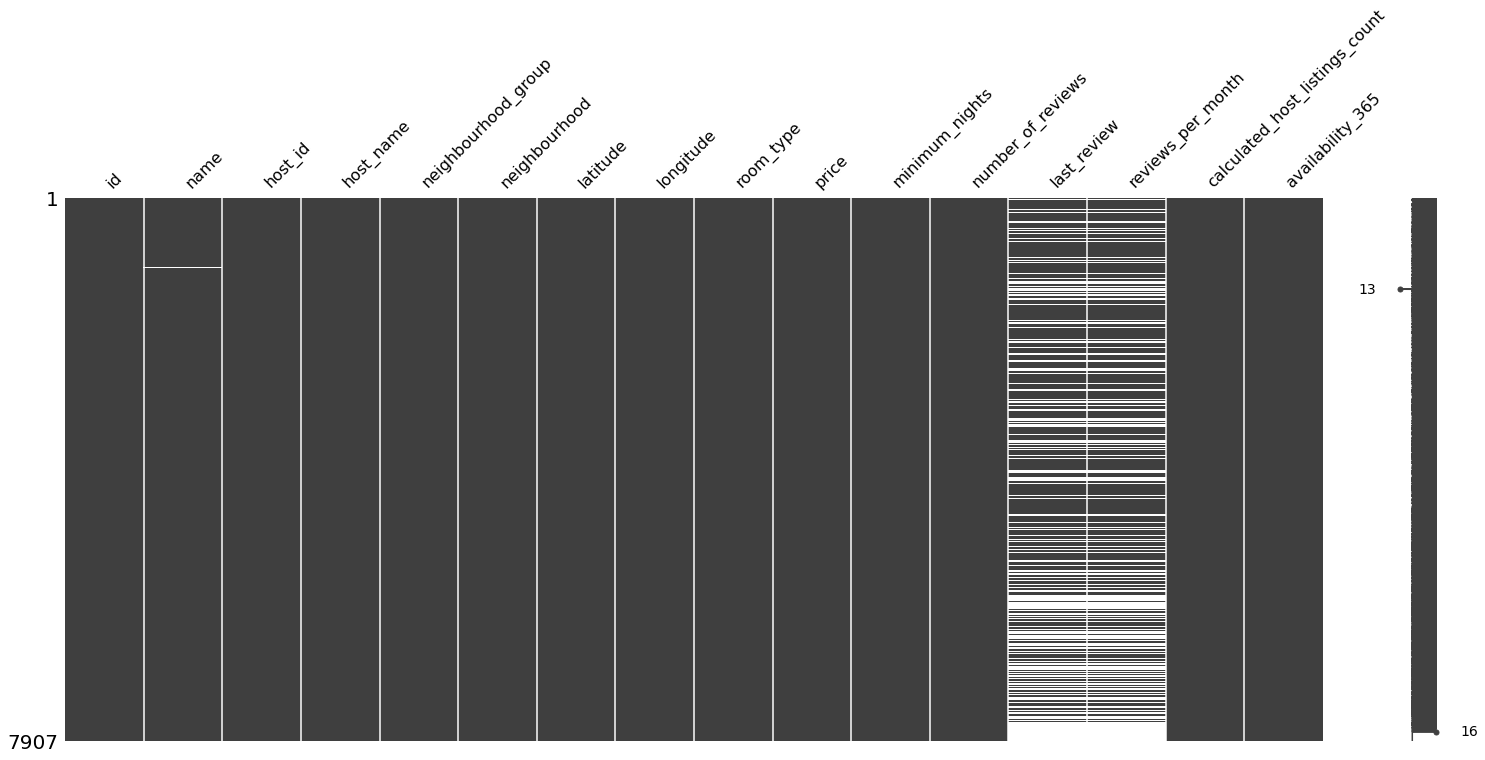

In [7]:
import missingno as msno

msno.matrix(data)

In [8]:
mv_percent =  data.isna().sum() / len(data) *100
mv_percent = mv_percent[mv_percent > 0]
mv_percent = pd.DataFrame({'feature': mv_percent.keys(), 'missing value %': mv_percent.values})
mv_percent

,feature,missing value %
0,name,0.025294
1,last_review,34.880486
2,reviews_per_month,34.880486


last_review and reviews_per_month have more than 20% of missing value. I choose to drop these columns.

In [9]:
data = data.drop(columns=['last_review','reviews_per_month'], axis=1)

In [10]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,9,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,38105126,Loft 2 pax near Haw Par / Pasir Panjang. Free ...,278109833,Belle,Central Region,Queenstown,1.27973,103.78751,Entire home/apt,100,3,0,31,61
7903,38108273,3bedroom luxury at Orchard,238891646,Neha,Central Region,Tanglin,1.29269,103.82623,Entire home/apt,550,6,0,34,365
7904,38109336,[ Farrer Park ] New City Fringe CBD Mins to MRT,281448565,Mindy,Central Region,Kallang,1.31286,103.85996,Private room,58,30,0,3,173
7905,38110493,Cheap Master Room in Central of Singapore,243835202,Huang,Central Region,River Valley,1.29543,103.83801,Private room,56,14,0,2,30


<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

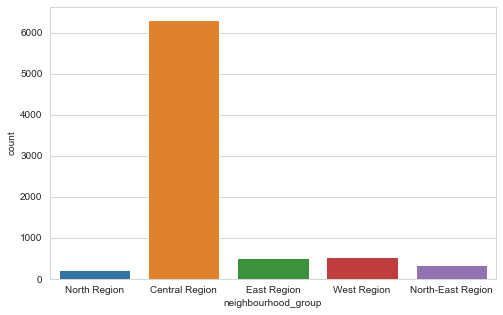

In [27]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='neighbourhood_group', data=data)

- Most of the neighbourhood are in the central region

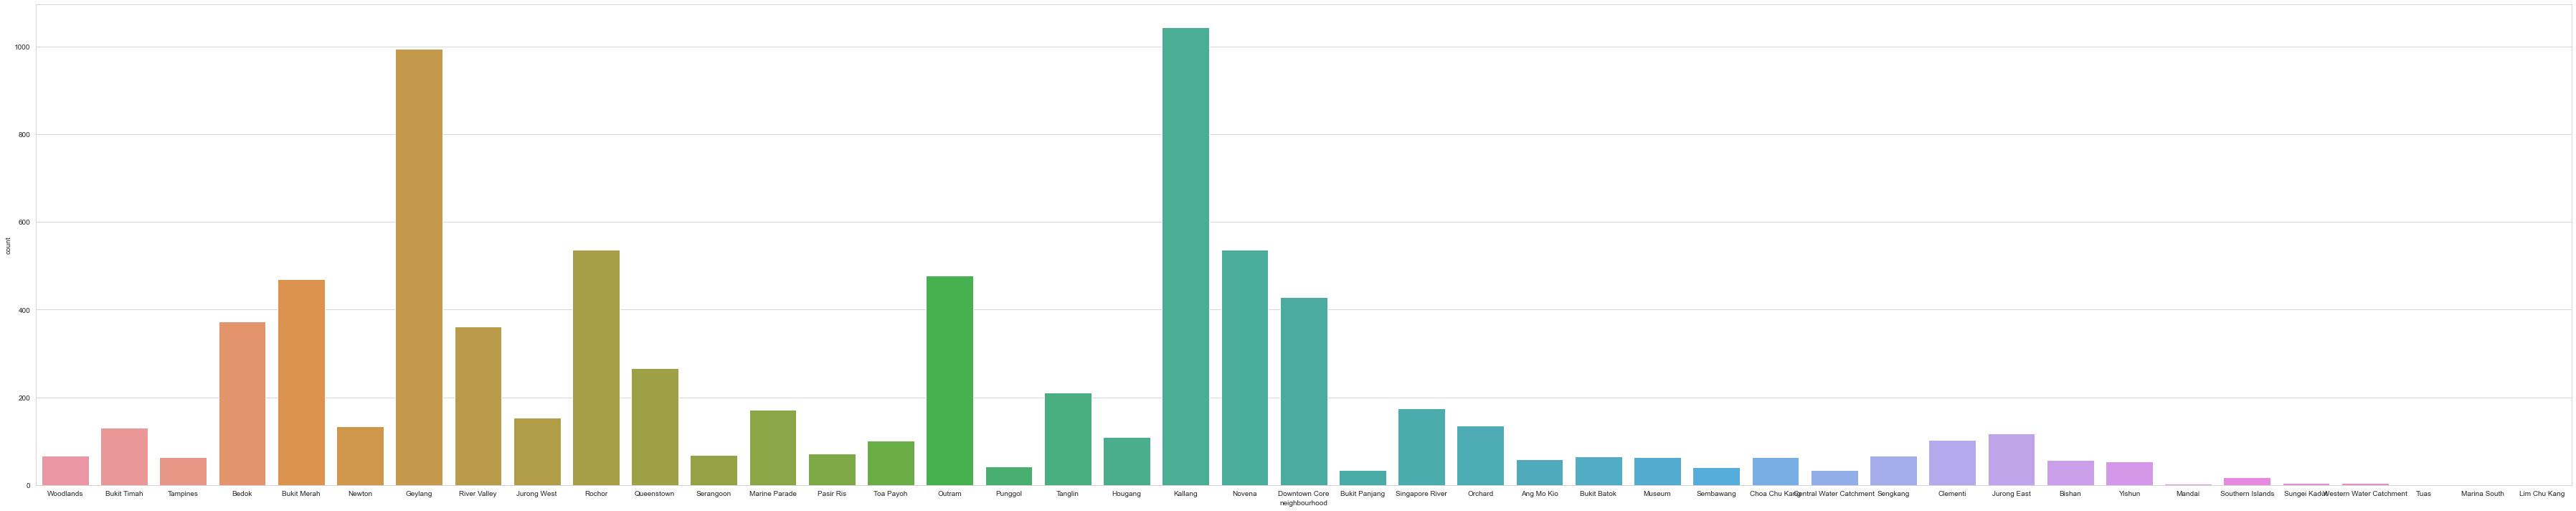

In [28]:
plt.figure(figsize=(50,10))
sns.countplot(x='neighbourhood', data=data)
plt.tight_layout()
plt.show()

- About A thousand of neighbourhood are in Geylang ang Kaylang

<AxesSubplot:>

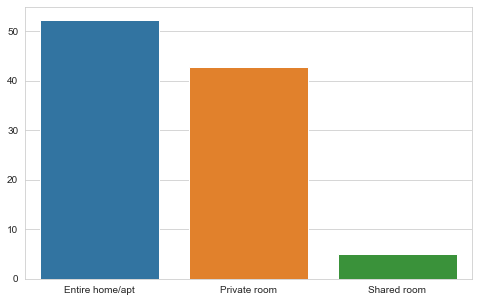

In [29]:
room = data.room_type.value_counts(normalize=True) * 100
plt.figure(figsize=(8,5))
sns.barplot(x=room.keys(), y=room.values)

In [90]:
room 

Entire home/apt    52.257493
Private room       42.759580
Shared room         4.982927
Name: room_type, dtype: float64

- 52.25% for rental are apartment/home 
- 42.75% for rental are private room
- 4.98%  for rental are shared room

<AxesSubplot:xlabel='price'>

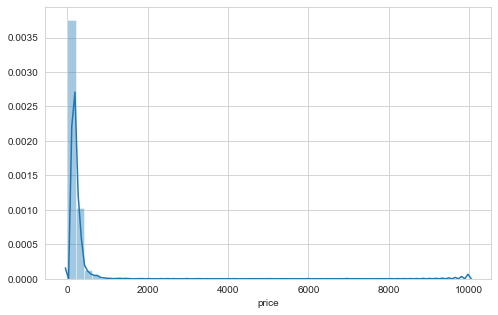

In [30]:
plt.figure(figsize=(8,5))
sns.distplot(data.price)

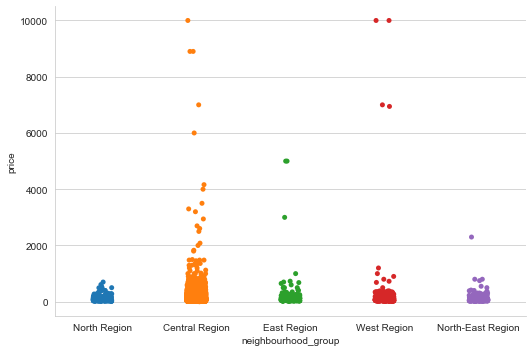

In [34]:
sns.catplot(x='neighbourhood_group', y='price', data=data, aspect=1.5)

- From the plot, we find central region have more higher price

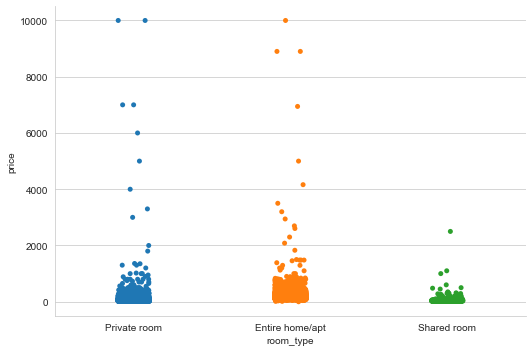

In [35]:
sns.catplot(x='room_type', y='price', data=data, aspect=1.5)

- Private room and Home/Apartment have more higher price
- Shared room tend to have more less price 

Text(0.5, 1.0, 'Room Type with Price below 500')

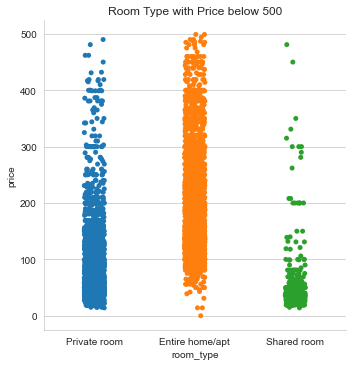

In [115]:
a = data[data.price < 500]
a
sns.catplot(x='room_type', y='price', data=a)
plt.title('Room Type with Price below 500')

- Most of private room have price below 500
- Most of shared room have price below 100

Text(0.5, 1.0, 'Room Type with Price below 100')

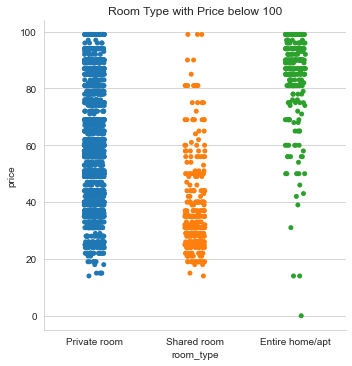

In [105]:
a = data[data.price < 100]
a
sns.catplot(x='room_type', y='price', data=a)
plt.title('Room Type with Price below 100')

- There are not many Home/apartment which have price below 100

We can conclude if someone are going to singapore with low budget, shared room or private room are more reliable because home or apartment type are more pricey

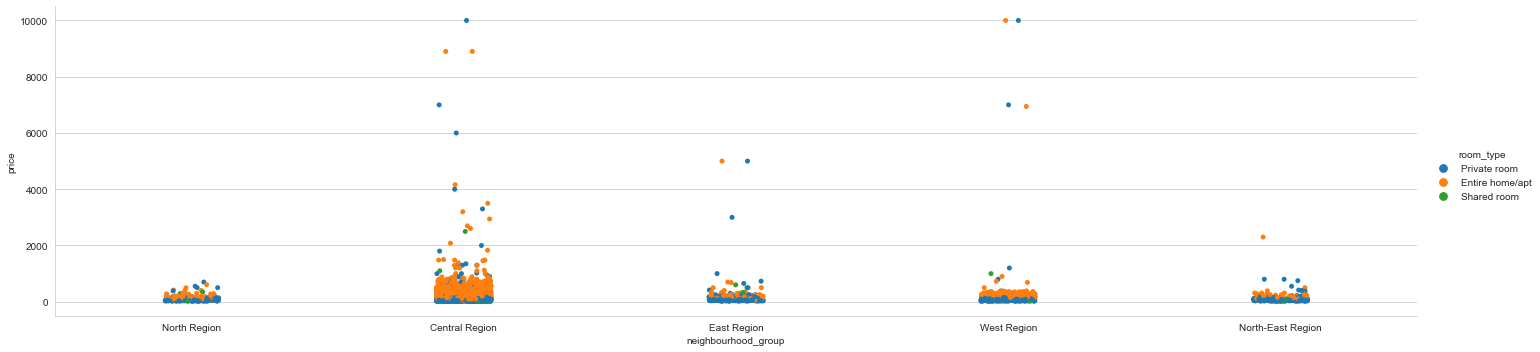

In [42]:
sns.catplot(x="neighbourhood_group", y="price",
                hue="room_type",data=data,aspect=4)

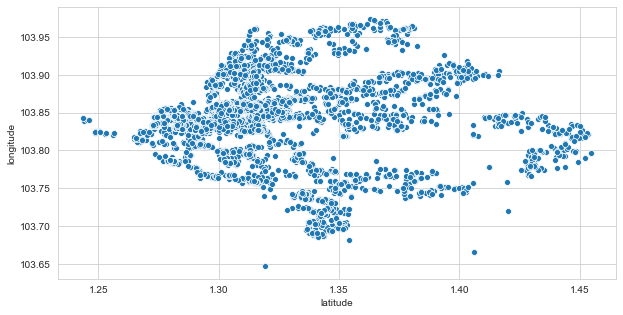

In [63]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=data.latitude, y=data.longitude)
plt.ioff()

In [64]:
# All neighbourhood distribution at Singapore
import folium
from folium.plugins import HeatMap
m=folium.Map([1.44255,103.79580],zoom_start=11)
HeatMap(data[['latitude','longitude']],radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

In [65]:
# Shared room distribution on Singapore
a = data[data['room_type']== 'Shared room']
m=folium.Map([1.44255,103.79580],zoom_start=11)
HeatMap(a[['latitude','longitude']],radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

- There are shared room type for rental at some location, but most of them are on the center (Base on map: From china town to Bendemeer) 

In [66]:
# Private room distribution on Singapore
a = data[data['room_type']== 'Private room']
m=folium.Map([1.44255,103.79580],zoom_start=11)
HeatMap(a[['latitude','longitude']],radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

- Private room type for rental seems more well distributed at the country

In [68]:
# Home/Apartment room distribution on Singapore
a = data[data['room_type']== 'Entire home/apt']
m=folium.Map([1.44255,103.79580],zoom_start=11)
HeatMap(a[['latitude','longitude']],radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

- Home/Apartment also well distributed but more on the center

<AxesSubplot:xlabel='minimum_nights'>

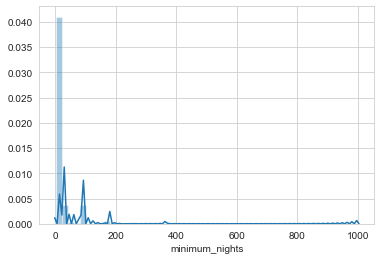

In [83]:
sns.distplot(data.minimum_nights)

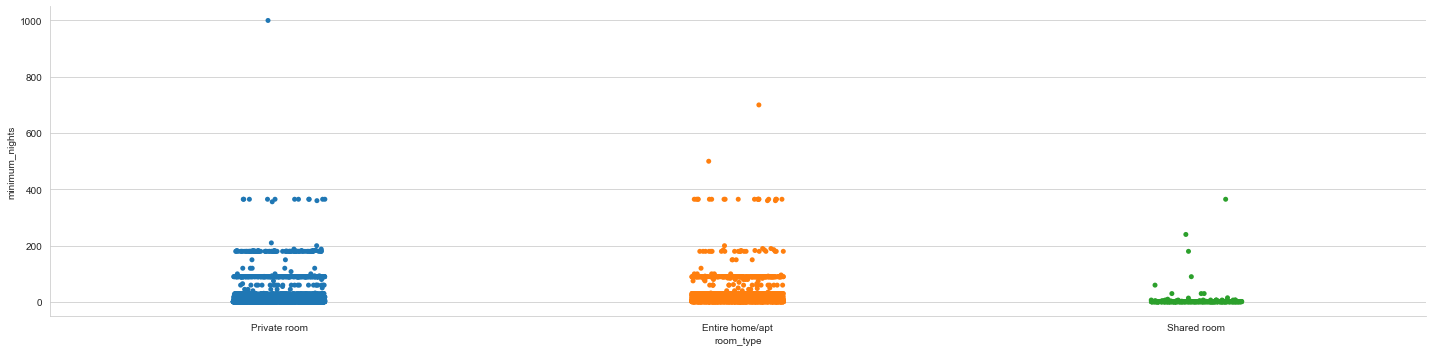

In [84]:
sns.catplot(x="room_type", y="minimum_nights",
                hue="room_type",data=data,aspect=4)

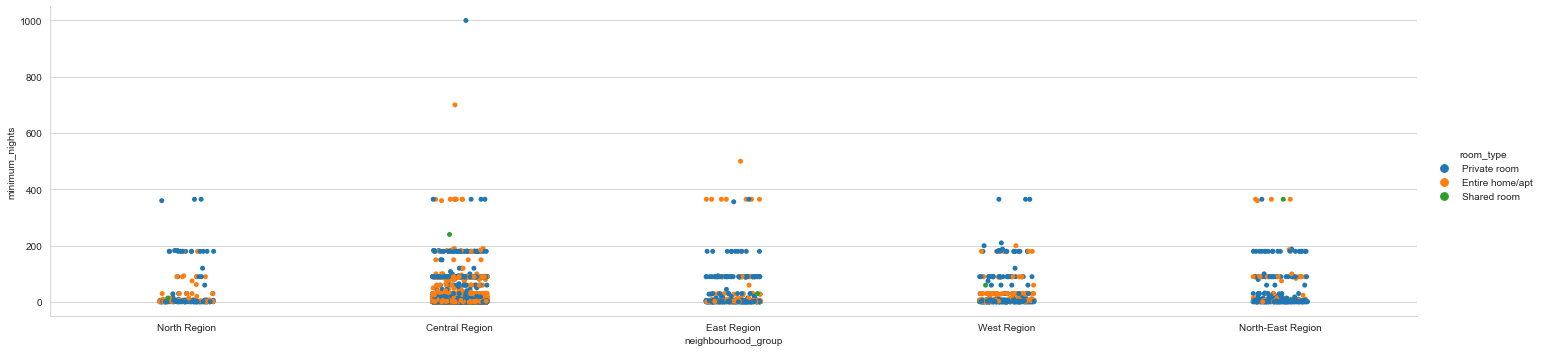

In [85]:
sns.catplot(x="neighbourhood_group", y="minimum_nights",
                hue="room_type",data=data,aspect=4)

<AxesSubplot:xlabel='availability_365'>

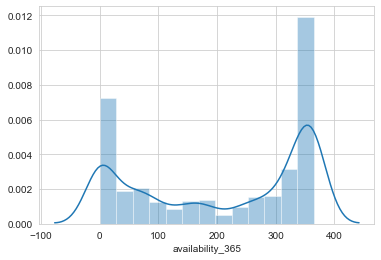

In [86]:
sns.distplot(data.availability_365)

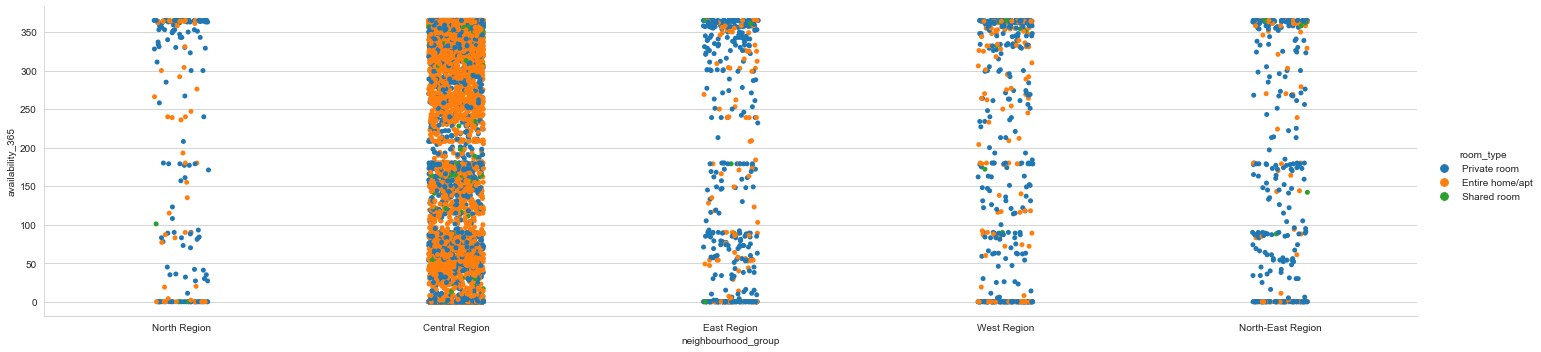

In [87]:
sns.catplot(x="neighbourhood_group", y="availability_365",
                hue="room_type",data=data,aspect=4)

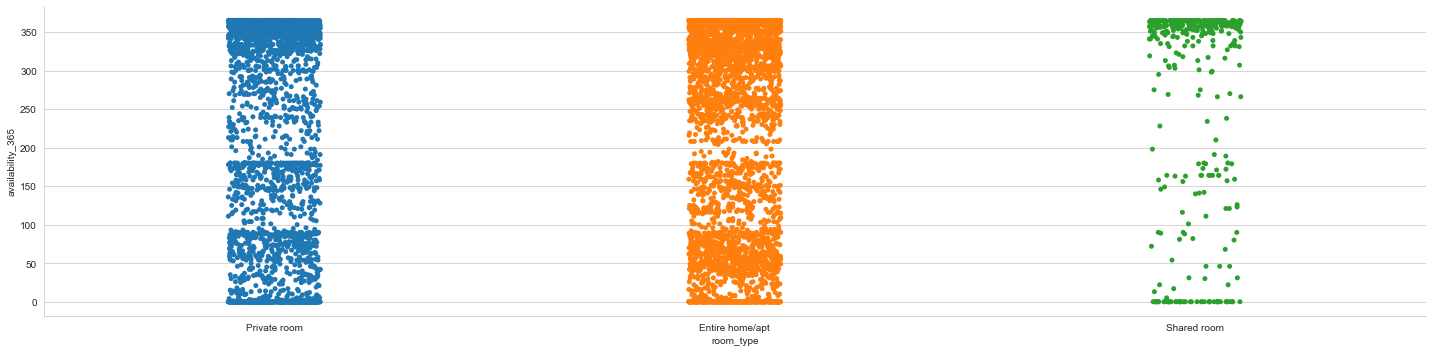

In [88]:
sns.catplot(x="room_type", y="availability_365",
                hue="room_type",data=data,aspect=4)

<AxesSubplot:xlabel='number_of_reviews'>

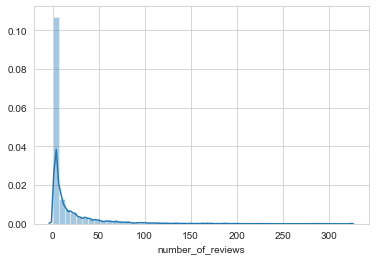

In [129]:
sns.distplot(data.number_of_reviews)

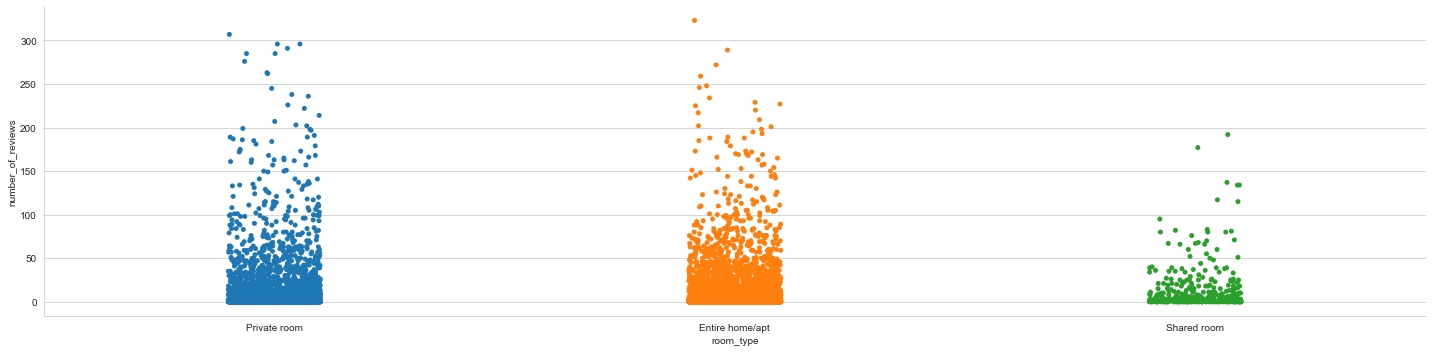

In [132]:
sns.catplot(x="room_type", y="number_of_reviews",
                hue="room_type",data=data,aspect=4)

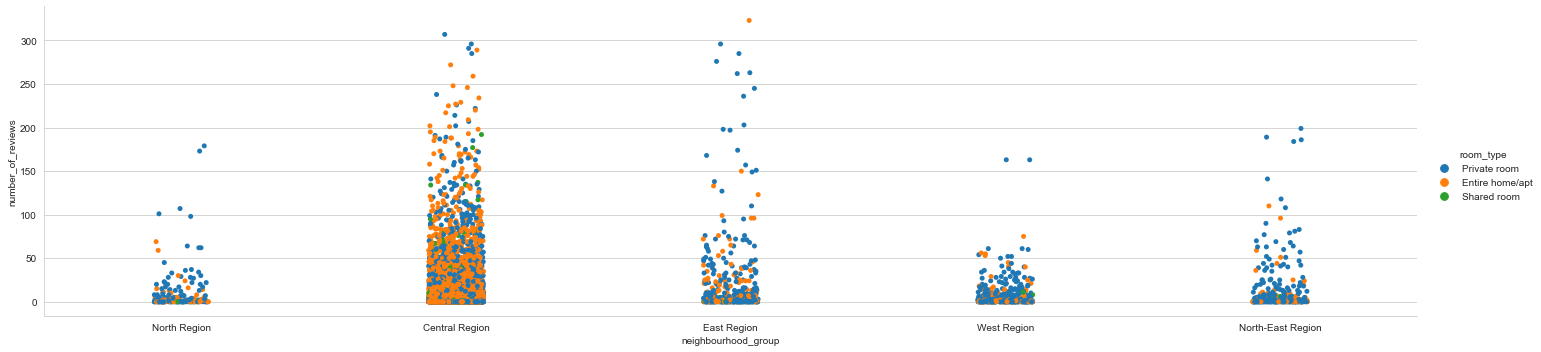

In [131]:
sns.catplot(x="neighbourhood_group", y="number_of_reviews",
                hue="room_type",data=data,aspect=4)

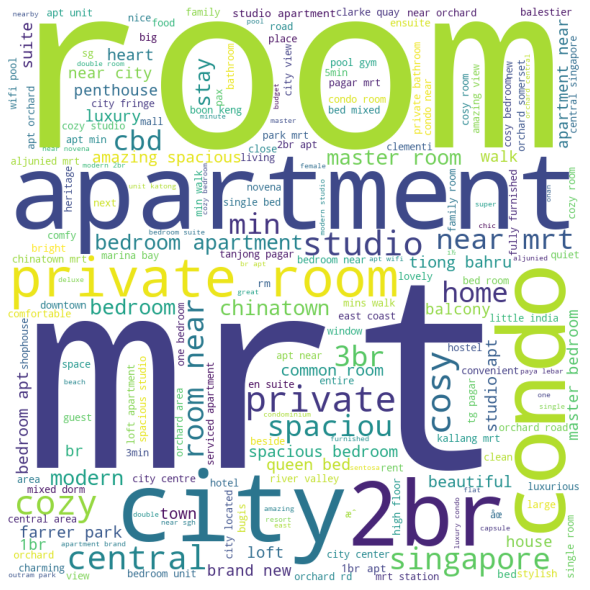

In [136]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for i in data.name: 
      
    # typecaste each val to string 
    i = str(i) 
  
    # split the value 
    tokens = i.split() 
      
    # Converts each token into lowercase 
    for j in range(len(tokens)): 
        tokens[j] = tokens[j].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 